# 🚜 Predicting the sale price of bulldozers

Since trying to predict a number, so this kind of problem is known as a **regression** problem.

The data and evaluation metric used here (i.e. Root Mean Square Log Error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).

_The techniques used in here have been inspired and adapted from the [fast.ai machine learning course](https://course18.fast.ai/ml) and https://github.com/mrdbourke/zero-to-mastery-ml/._


## 1. Problem Definition

**Problem is :** How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data
Looking at the dataset from Kaggle, notice it's a time series problem. This means, there's a time attribute to dataset.

The dataset is hosted by Kaggle, here -> https://www.kaggle.com/c/bluebook-for-bulldozers/data

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

1. **Train.csv -** Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).


2. **Valid.csv -** Historical bulldozer sales examples from January-1-2012 to April-30-2012 (close to 12,000 examples with the same attributes as Train.csv).


3. **Test.csv -** Historical bulldozer sales examples from May-1-2012 to November-2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).


## 3. Evaluation
For this problem, [Kaggle has set the evaluation metric to being `Root Mean Squared Log Error (RMSLE)`](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). The goal will be to get this value as low as possible, as it's for most other regression problems also.


## 4. Features
Features are different attributes(parts) of the data.<br>
One of the most common ways to do this, is to create a **data dictionary**.

For this dataset, Kaggle provide a data dictionary - Data Dictionary.xlsx (present in _data_ folder) - which contains information about what each attribute of the dataset means.

In [237]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the training and validation set
df = pd.read_csv("./data/TrainAndValid.csv", low_memory=False)

In [3]:
# No parse_dates... check dtype of "saledate"
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

<br>

Take a look at "saledate" attribute/column of `df` :

( _Notice that `dtype` would be an object_ )
<br>

In [4]:
df["saledate"][:1000]     # only first 1000 data points

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<br>

Plotting `saledate` (x-axis) against `SalePrice` (y-axis) for only first 1000 data points.

<br>

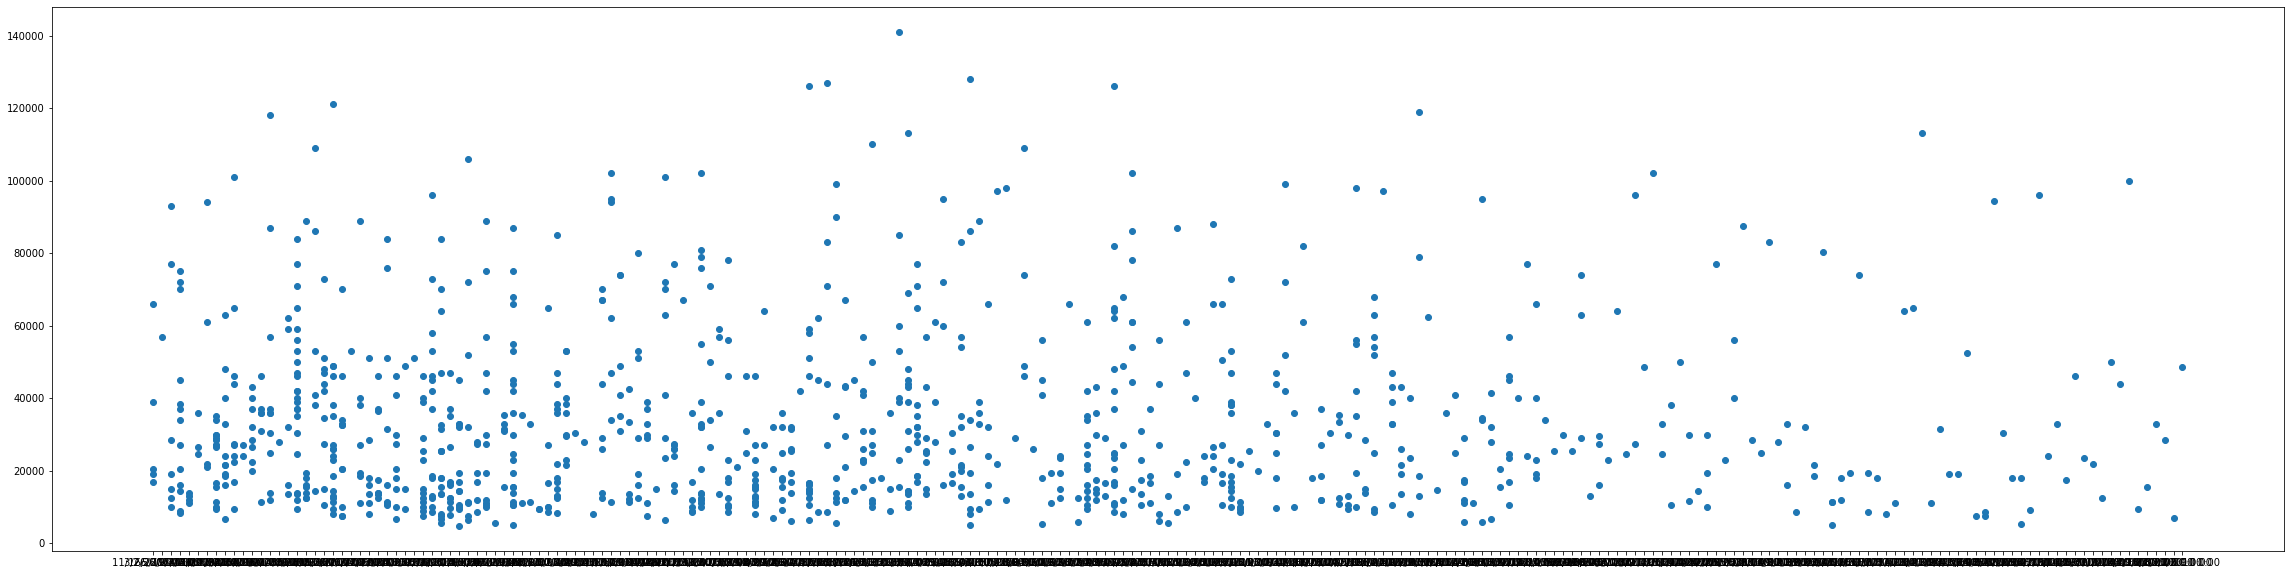

In [5]:
fig, ax = plt.subplots(figsize=(40,10))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

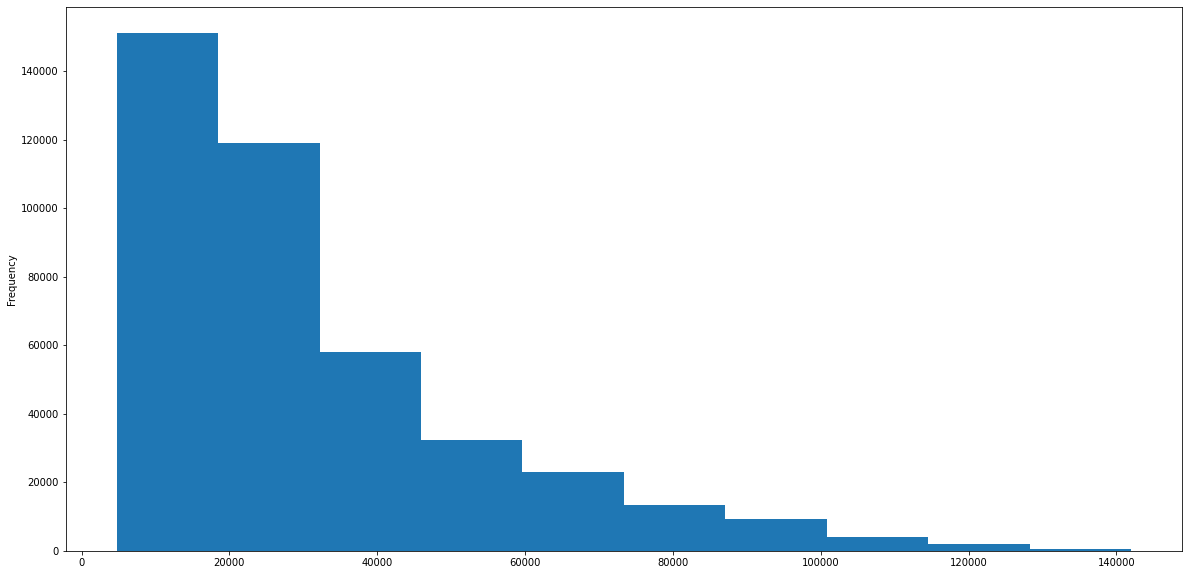

In [6]:
df.SalePrice.plot.hist(figsize=(20,10))

<br>

Check to see, if each columns in `df` have missing values :

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<br>

## Parsing dates

While working with time series data, it's a good idea to make sure any date data is the format of a `datetime` object (i.e. a Python data type which encodes specific information about dates).

<br>

Initially, `dtype` of "saledate" attribute would be **'O'** i.e. **'object'** :

<br>

In [8]:
df["saledate"].dtype

dtype('O')

In [9]:
df = pd.read_csv("./data/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [10]:
# With parse_dates... check dtype of "saledate"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

<br>

<br>

Now, `dtype` of "saledate" is changed to **'datatime64'**.

<br>

In [11]:
df['saledate'].dtype

dtype('<M8[ns]')

<br>

Now take a look at "saledate" attribute/column of `df` :

( _Notice that `dtype` would now be datatime_ )

<br>

In [12]:
df["saledate"][:1000]             # only first 1000 datapoints

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

<br><br>

Notice the below scatter plot. Now it shows the x-axis in years format :

<br>

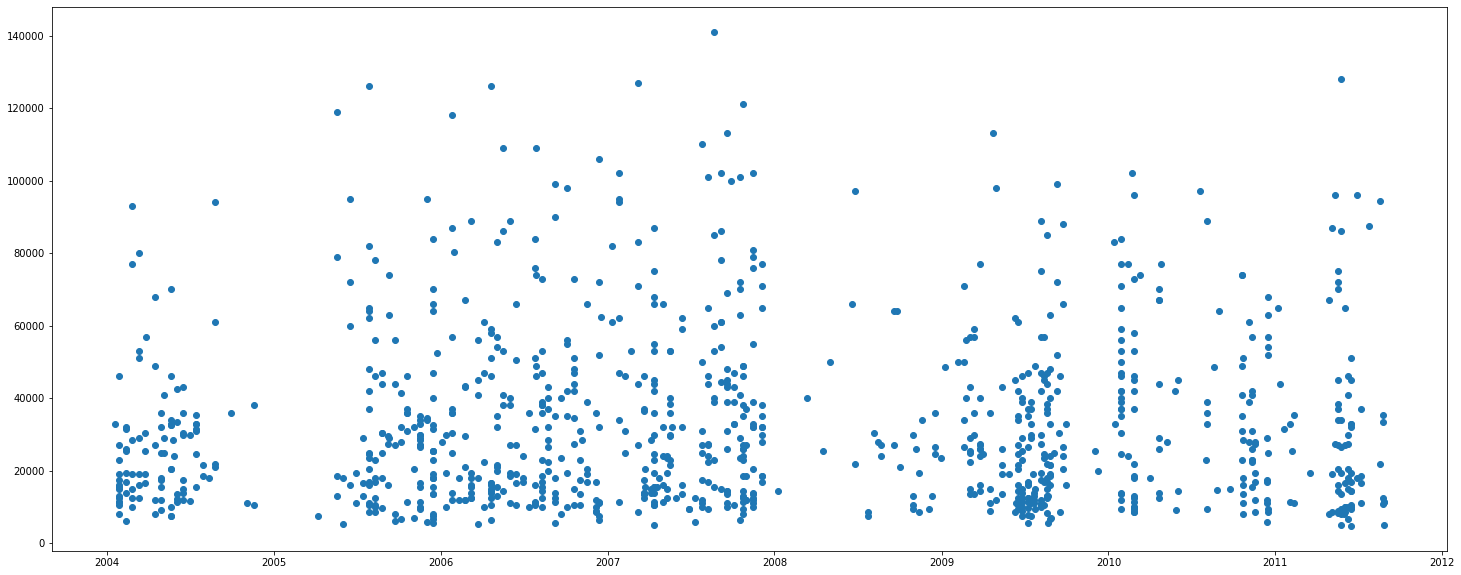

In [13]:
fig, ax = plt.subplots(figsize=(25,10))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])


<br>

## Sort DataFrame by "saledate"

Best practice to work on a time series problem is to sort data by the date they occur :

In [14]:
# Sort DataFrame in date order - i.e. saledate
df.sort_values(by=["saledate"],
               inplace=True,
               ascending=True)


df["saledate"].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

<br>
<br>

In [15]:
df_tmp = df.copy()        # creating a copy of "df" dataframe

<br>
<br>

<br><br>

## Add `datetime` parameters for "saledate" column :

This is done to enrich (expand) the dataset with as much information as possible.<br>
Like here, **"saledate"** column is expanded into 5 columns - **"saleYear", "saleMonth", "saleDay", "saleDayOfWeek", "saleDayOfYear"**.<br>
Further, "saledate" column would be dropped.

Since the dataset is now parsed via `parase_dates=["saledate"]` ; access to [different datetime attributes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) of the `saledate` column can be done :

In [16]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear


# Drop original saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


<br><br>

In [18]:
# Check the different values of different columns

df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

<br><br>

## Convert strings to categories

One way to help turn all of data into numeric format is to convert the columns with the string datatype into a categorical datatype.

> To do this, use the [pandas types API](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality) which allows us to interact and manipulate the types of data.

<br>

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


<br><br>

Checking for columns "UsageBand" and "Steering_Controls", if they're a string type :

In [20]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [21]:
pd.api.types.is_string_dtype(df_tmp["Steering_Controls"])

True

<br><br>

Turning all of the string value-types into category value-types :

In [22]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        # print(label)
        
        df_tmp[label] = content.astype("category").cat.as_ordered()
        # turning all of the string value-types into category value-types as well as generating it in-order
        
    # print(type(label), '\n\n', type(content) ,end='\n ****X**** \n')

In [23]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

<br><br>

In [24]:
df_tmp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [25]:
df_tmp["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

<br><br>

Now, the problem which remains is there are lots of missing values in `df_tmp` DataFrame :

<br>

In [26]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

<br><br>

✅ Just exporting the `df_tmp` dataframe to make it accessible easily in future :

<br>

In [27]:
df_tmp.to_csv("./data/Train_tmp.csv",
               index=False)

In [28]:
df_tmp = pd.read_csv("./data/Train_tmp.csv",
                     low_memory=True)

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


<br><br>

Again, just checking for missing values :

In [30]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

<br><br>

## Convert strings to categories (...continued)


## Fill missing values (i.e. Encoding)

> ✅In order to create a machine learning model, remember :<br>
> * All of data has to be numerical.
> * There cannot be any missing values.

## I. Filling numerical values first

Fill any column (with numerical values) with missing values with the median-value of that column :

<br>

In [31]:
# how many columns are numeric :

print('Below columns are numeric in nature :\n')

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
        
print('\n\n')

Below columns are numeric in nature :

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear





In [32]:
# Check for which numeric columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum() :
        print(label)
        
print('\n\n')

auctioneerID
MachineHoursCurrentMeter





In [33]:
# Fill numeric rows having null values, with the median-value of that column

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum() :
        # Add a binary column which tells if the data was missing or not
        df_tmp[label+"_is_missing"] = pd.isnull(content)
            
        # Fill missing numeric values with median since it's more robust than the mean
        df_tmp[label] = content.fillna(content.median())


In [34]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,NaN,D38E,...,None or Unspecified,NaN,NaN,2012,4,28,5,119,False,True
412694,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,NaN,2064,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
412695,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,NaN,337G,...,NaN,NaN,NaN,2012,4,28,5,119,False,True
412696,6266251,55000.0,509560,3357,149,99.0,1993,0.0,NaN,12G,...,NaN,NaN,NaN,2012,4,28,5,119,False,True


<br><br>
> 🔴Why add a binary column that indicates whether the data was missing or not?<br><br>
> All of the missing numeric values in dataset can be filled over by the median. However, factually a numeric value may be missing for a reason. In other words, absence of evidence may be an evidence of absence. So, in order to compensate for this absence, adding a binary column which indicates whether the value was missing or not (i.e. True or False) helps to retain this information.


<br>

## II. Filling and turning Categorical Variables to Numberic type

<br>

In [55]:
# Check columns which *aren't* numeric

print("Below columns are not numeric in nature :\n")
i=0
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        i += 1
        print(label)

print('\n\nNo. of columns which are not numeric type => i =', i)
        
print("\n\n")

Below columns are not numeric in nature :

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


No. of columns which are not numeric type => i = 44





<br><br>

An example to convert "Coupler" categorical column into its numeric-type, can be :

In [64]:
pd.Categorical(df_tmp["Coupler"]).categories              # so it has, 3 categories

Index(['Hydraulic', 'Manual', 'None or Unspecified'], dtype='object')

In [72]:
pd.Categorical(df_tmp["Coupler"]).codes

array([-1,  2, -1, ...,  2, -1,  2], dtype=int8)

<br><br>

> ✅**Pandas encodes missing categories as `-1`.**<br>
• Hence, `+1` can be added while converting categories to its numeric-type, as pandas will add a 1 to the encoded category and resultingly all categories would be positive.<br>
• Moreover a `0` would mean, that particular category is missing.  

<br>

So for every column, turning categrical variable into numberic-type :

<br>

In [74]:
# Turn categorical variables into numbers

for label, content in df_tmp.items():

    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        
        # Add a binary column to inidicate whether sample had missing value
        df_tmp[label + "_is_missing"] = pd.isnull(content)
        
        # add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [75]:
df_tmp.info()   # now, check for info. Notice, now df_tmp has got 103 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


<br>

Check to see what `df_tmp` now becomes :

In [76]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


<br>

Now, check to see if `df_tmp` still bears any missing (or, null) values :

In [81]:
df_tmp.isna().sum()       # Finally, no missing values are present after the encoding

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
                             ..
Stick_is_missing              0
Transmission_is_missing       0
Turbocharged_is_missing       0
Blade_Extension_is_missing    0
Blade_Width_is_missing        0
Length: 80, dtype: int64

<br><br>

## 5. Modelling

Using [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1),
          df_tmp.SalePrice)

CPU times: user 26min 8s, sys: 12.2 s, total: 26min 20s
Wall time: 1min 55s


RandomForestRegressor(n_jobs=-1, random_state=42)

<br>

### Splitting data into train/valid sets

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data) for this problem, the validation set and test set are split according to dates.

This makes sense since this problem is a time series problem.

For eg. : using past events to try and predict future events.

So in this problem, the dataset is split into training, validation and test sets based on the date of each sample, whenever it occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012


In [87]:
df_tmp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

<br>

Split data into training and validation :

In [88]:
# Split data into training and validation

df_val = df_tmp[df_tmp["saleYear"] == 2012]

df_train = df_tmp[df_tmp["saleYear"] != 2012]

len(df_val), len(df_train)                     # len(df_tmp) = 11573 + 401125

(11573, 401125)

In [89]:
# Split data into X & y

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]

X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]


X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

<br>
__________________________________________________________________________________________________________________
<br>

### ✅ STEPS RECALL  :

* Encode/transform all **categorical variables** of the dataset (on the entire dataset, this ensures categorical variables are encoded the same across training/test sets).


* Split your data (into train/test).


* Fill the training set and test set numerical values separately.
> 🔴Don’t use numerical data from the future (test set) to fill data from the past (training set).

<br>
__________________________________________________________________________________________________________________
<br><br><br>

## Building an evaluation function

According to Kaggle for the [Bluebook for Bulldozers competition, the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they had asked for is Root Mean Squared Log Error (RMSLE).


Scikit-Learn doesn't have a function built-in for RMSLE, so better is to create a custom function.

It can be done by taking the square-root of Scikit-Learn's `mean_squared_log_error (MSLE)`. MSLE is the same as taking the log of mean squared error (MSE).

In [94]:
# Create evaluation function (the competition uses Root Mean Square Log Error)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    """
    Calculate root-mean-squared-log-error between predicitons and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


# Create function to evaluate the model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R²": model.score(X_train, y_train),
              "Valid R²": model.score(X_valid, y_valid)}
    return scores

<br><br>

## Testing the model on a subset of dataset (i.e. to tune the hyperparameters)

## I.

Better strategy is to take a sample of the training set and tune the hyperparameters on that before training a model on larger or complete dataset.<br>This is practiced so as to save time (a lot of time, indeed 🙂) because larger data takes longer time to train.

<br>

Let's alter the number of samples each `n_estimator` in the `RandomForestRegressor` sees using the `max_samples` parameter :

<br>

In [95]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

<br>

Setting `max_samples` to `10000` means every `n_estimator` (which is default to : 100) in this `RandomForestRegressor` model will only see `10000` random samples from complete DataFrame (`df_tmp`) instead of the entire 400K+ samples.

In other words, model will be looking at approx **40x less samples** which means, • faster computation speeds, • but might expect the results to worsen because the model has less samples to learn patterns from.

<br>

In [96]:
%%time

# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 46.4 s, sys: 836 ms, total: 47.2 s
Wall time: 5.08 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [97]:
show_scores(model)

{'Training MAE': 5541.916187547521,
 'Valid MAE': 7153.955174112157,
 'Training RMSLE': 0.25701380096932397,
 'Valid RMSLE': 0.29398523308370716,
 'Training R²': 0.8617777343244982,
 'Valid R²': 0.8335936179935957}

<br>

## II. Hyperparameter tuning with RandomizedSearchCV

One can increase `n_iter` to try more combinations of hyperparameters. (Here let's try for `n_iter=20`).

<br>

In [98]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate a model
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 7min, sys: 26.5 s, total: 7min 26s
Wall time: 7min 27s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

<br><br>

Now, find the best parameters from the RandomizedSearch :

In [99]:
# Find the best parameters from the RandomizedSearch 

rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

<br><br>
Evaluate the RandomizedSearch model on that model found via `best_params_` :

In [101]:
show_scores(rs_model)

{'Training MAE': 5786.075958435477,
 'Valid MAE': 7344.80624584597,
 'Training RMSLE': 0.26546369295077177,
 'Valid RMSLE': 0.29539739383429964,
 'Training R²': 0.8470727349590852,
 'Valid R²': 0.8183016383914271}

<br><br>

## Train a model with the best parameters

<br>

_**Disclaimer :**<br>In a model I prepared earlier, I tried with `n_iter=100` in `RandomizedSearchCV` and found the best results, that I've listed below.<br>
This kind of search on my computer (`n_iter=100`) took ~2 hours._<br>

_Let's instantiate a new model with these discovered hyperparameters and reset the `max_samples` back to its original value (`max_samples=None`)._

<br>

In [104]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    random_state=42,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 5min 6s, sys: 2.54 s, total: 5min 9s
Wall time: 25.2 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

<br>

Now, calculate scores of `ideal_model` on whole train-data :

In [106]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R²': 0.9588145522577225,
 'Valid R²': 0.8818019502450094}

<br><br>

## Make predictions on the Test dataset

The model (`model`/`ideal_model`/`rs_model`) is trained on data prior to 2011. However, the test data is from May 1st 2012 to November 2012.

So, let's try to predict SalePrice on test-data :

<br>

In [185]:
df_test = pd.read_csv("./data/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])


df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


<br><br>

## I. Preprocessing the Test dataset

**🔴Remember, the model can't be directly worked upon `df_test` because of below problems :**

* `df_test` is not in same format as the `X_train` (which was formerly derived from `df_train`). Both bear different number of columns.


* Categorical values of `df_test` haven't ben encoded to their numeric type. This can be checked by doing the `.info()` and `.isna().sum()` on test dataset.

* In `df_test`, a column _"auctioneerID"_ is filled. However in `df_train` this same column had missing values, so it's binary column - *autioneerID_is_missing* was created while encoding procedure.
<br>

In [186]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [187]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

<br><br>

In [188]:
print('Test dataset columns =',len(df_test.columns))

# It's evident that test data format isn't same as of training data's.

print('Train dataset columns =',len(X_train.columns))

Test dataset columns = 52
Train dataset columns = 102


<br>

So, practice the same steps (for pre-process of training data) to pre-process the test data :

<br>

In [189]:
def preprocess_data(df):
    """
    Perform transformation (enriching/expansion) on `df` and returns it.
    """
    
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Fill missing categorical data and Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            # add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [190]:
df_test = preprocess_data(df_test)

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [191]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


<br>

Well, categorical and numerical missing data have been handled.<br>

But still, `df_test` has `101` columns which is unequal to `X_train` equal to `102` columns.<br>
It's because :

In [192]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

<br>

To fix it, add a column to the test dataset called _"auctioneerID_is_missing"_ and fill it with `False`, since none of the _auctioneerID_ fields are missing in the test dataset :

<br>

In [195]:
# Manually add column to test dataset

df_test["auctioneerID_is_missing"] = False

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


<br>

Make predictions on the test dataset using the `ideal_model` :

In [196]:
# Make predictions on the test dataset using the best model

test_preds = ideal_model.predict(df_test)

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


<br>

Acc. to Kaggle's requirements for this problem, create a compatible dataframe : 

In [197]:
# Create DataFrame compatible with Kaggle submission requirements

df_preds = pd.DataFrame()

df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds

df_preds

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [ ]:
# Export to csv...
# df_preds.to_csv("./data/Train-predicitons.csv",
#                 index=False)

## Feature Importance

So building of a model is over, and it's also able to make predictions.

**Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.**

For eg: _In this Kaggle problem, after the model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price ?_

> 🔴**Beware :** The default `feature importances` for Random Forests can lead to non-ideal results.

Doing this for `RandomForestRegressor` leads us to find the `feature_importances_ attribute` :

In [222]:
# Find feature importance of our best model

ideal_model.feature_importances_, len(ideal_model.feature_importances_)

(array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
        3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
        4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
        1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
        1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
        8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
        1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
        2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
        2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
        7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
        8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
        4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
        8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
        3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.833499

<br>

So, the array returned by `.feature_importance ` bears a number w.r.t every column. Coz, array has length of `102`.

<br>

In [244]:
# import seaborn as sns

plt.style.use('seaborn-whitegrid')

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):                # n=20, means considering only top 20 columns
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True)
         )

    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(20,10))
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    fig.suptitle('Trend of Top-20 Features Importances', fontsize=16, fontweight='bold');
    
    # sns.barplot(x="feature_importance",
    #            y="features",
    #            data=df[:n],
    #            orient="h")

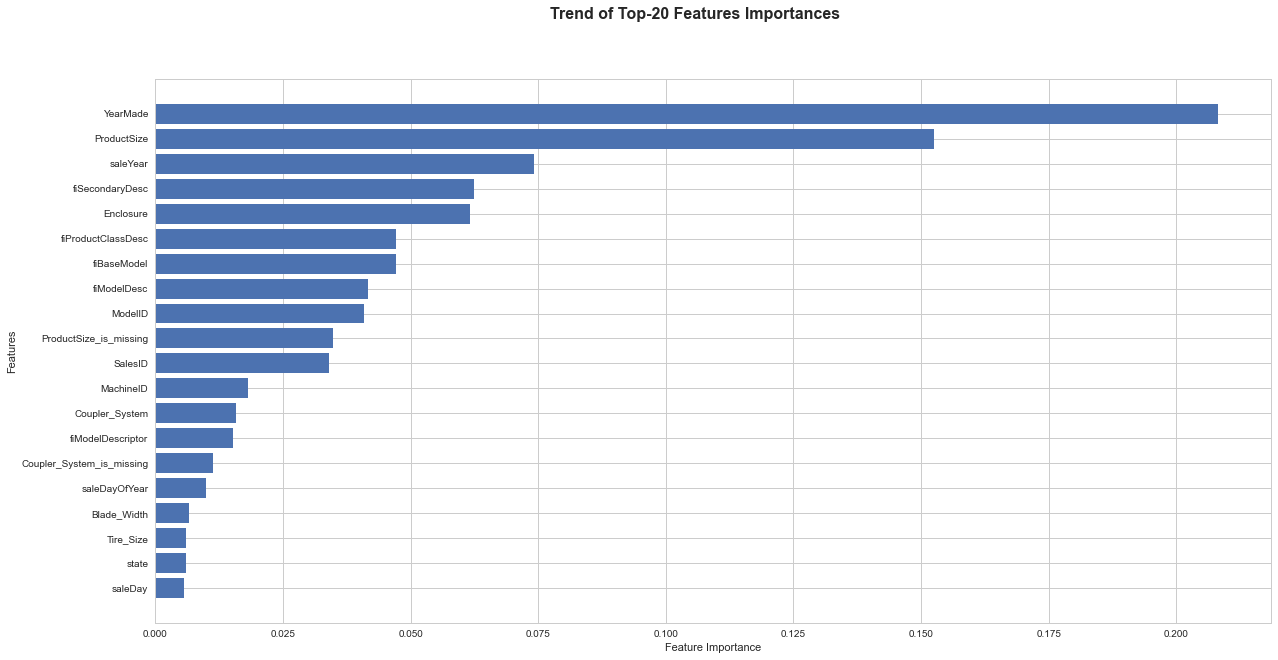

In [245]:
plot_features(X_train.columns, ideal_model.feature_importances_)


In [213]:
sum(ideal_model.feature_importances_)


1.0

In [214]:
df["ProductSize"].isna().sum()

216605

In [215]:
df["ProductSize"].value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [246]:
df["Turbocharged"].value_counts()


None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64

In [248]:
df["Thumb"].value_counts()


None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: Thumb, dtype: int64